In [1]:
%matplotlib inline
from tensorscaling import scale, unit_tensor, random_tensor, marginal
import numpy as np
import matplotlib.pyplot as plt

# Tensor scaling

Scale 3x3x3 unit tensor to certain non-uniform marginals:

In [2]:
shape = [3, 3, 3]
targets = [(.5, .25, .25), (.4, .3, .3), (.7, .2, .1)]

res = scale(unit_tensor(3, 3), targets, eps=1e-4)
res

Result(success=True, iterations=65, max_dist=8.901802576549e-05, ..., log_cap=-0.37562886794485073)

We can also access the scaling matrices and the final scaled state:

In [3]:
print(res.gs[0], "\n")
print(res.gs[1], "\n")
print(res.gs[2])

[[-0.98179206+0.08310703j -0.6847407 +1.23454873j  0.41167567+0.17355186j]
 [ 0.2782855 +0.22325433j -0.64880442+0.39756997j  0.10405664-0.02510198j]
 [-0.08609699+0.41869384j  0.16110788+0.54988533j -0.37726146+0.25547404j]] 

[[-0.20884334-0.52608173j -0.43841353-0.22263097j  0.18381737+1.3897339j ]
 [ 0.23411653+0.29201128j -0.16341741+0.45649612j  0.32907006+0.63745749j]
 [ 0.12209672+0.09771179j  0.19271776-0.14215783j  0.70162779+2.40092343j]] 

[[-1.53180053-0.13438182j  0.55861781+0.79027767j -0.16186817+0.35969357j]
 [-0.47271985+0.28744581j  0.14897723+0.14332133j -0.01019585-0.34057654j]
 [-0.14897149-0.29746561j  0.10036467-0.27751804j -0.03875172-0.02867671j]]


Let's now check that the W tensor *cannot* be scaled to uniform marginals:

In [4]:
shape = [2, 2, 2, 2]
W = np.zeros(shape)
W[1, 0, 0, 0] = W[0, 1, 0, 0] = W[0, 0, 1, 0] = W[0, 0, 0, 1] = .5
targets = [(.5, .5)] * 4

scale(W, targets, eps=1e-4, max_iterations=1000)

Result(success=False, iterations=1000, max_dist=0.5934653559719876, ..., log_cap=-304.31531974463286)

To see more clearly what is going on, we can set the `verbose` flag:

In [5]:
res = scale(W, targets, eps=1e-4, max_iterations=10, verbose=True)

scaling tensor of shape (2, 2, 2, 2) and type float64
target spectra:
  0: (0.5, 0.5)
  1: (0.5, 0.5)
  2: (0.5, 0.5)
  3: (0.5, 0.5)
#000: max_dist = 0.35355339 @ sys = 1
#001: max_dist = 0.47140452 @ sys = 2
#002: max_dist = 0.56568542 @ sys = 0
#003: max_dist = 0.62853936 @ sys = 3
#004: max_dist = 0.58232323 @ sys = 1
#005: max_dist = 0.59305730 @ sys = 2
#006: max_dist = 0.59545834 @ sys = 0
#007: max_dist = 0.59262283 @ sys = 3
#008: max_dist = 0.59353004 @ sys = 1
#009: max_dist = 0.59357133 @ sys = 2
#010: max_dist = 0.59340661 @ sys = 0
did not converge!


We see that at each point in the algorithm, one of the marginals has Frobenius distance $\approx 0.59$ to being uniform. Indeed, we know that the entanglement polytope of the W tensor does not include the point corresponding to uniform marginals -- see [here](https://www.entanglement-polytopes.org/four_qubits) for an interactive visualization!

# Tuples of matrices and tensors

We can just as well only prescribe the desired spectra for subsystems.
Note that prescribing two out of three marginals amounts to *operator scaling*.

In [6]:
shape = [3, 3, 3]
targets = [(.4, .3, .3), (.7, .2, .1)]

res = scale(unit_tensor(3, 3), targets, eps=1e-6)
res

Result(success=True, iterations=38, max_dist=9.363908653013667e-07, ..., log_cap=-0.1920604177161437)

Indeed, the last two marginals are as prescribed, while the first marginal is arbitrary.

In [7]:
print(marginal(res.psi, 0).round(5), "\n")
print(marginal(res.psi, 1).round(5), "\n")
print(marginal(res.psi, 2).round(5))

[[ 0.30664+0.j      -0.00371-0.00223j  0.01015-0.00682j]
 [-0.00371+0.00223j  0.31852+0.j      -0.00473+0.02424j]
 [ 0.01015+0.00682j -0.00473-0.02424j  0.37484+0.j     ]] 

[[ 0.4+0.j -0. -0.j -0. +0.j]
 [-0. +0.j  0.3+0.j -0. +0.j]
 [-0. +0.j -0. -0.j  0.3+0.j]] 

[[ 0.7+0.j  0. +0.j -0. +0.j]
 [ 0. -0.j  0.2+0.j  0. +0.j]
 [-0. -0.j  0. -0.j  0.1+0.j]]


# Gradient descent 

In [7]:

def rand_3tensor_unif(n):
    start = random_tensor([n,n,n])
    targets = [np.ones(n)/n,np.ones(n)/n,np.ones(n)/n]
    res, norms = scale(start, targets, eps=1e-4, method = "gradient")
    return norms

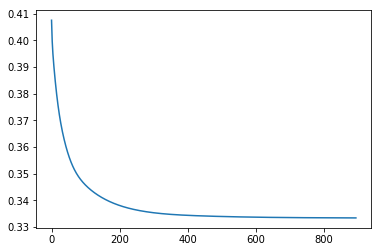

In [11]:
rand_3tensor_unif(5)
plt.plot(norms)

In [19]:
np.linalg.eigvalsh(np.matrix([[1,0],[0,2]]))

array([1., 2.])